Jenn Werth
PR2 Part 3

In this part we are working on the FCN network which is a fully convolutional network for semantic
segmentation.

Download 5 (or more) pictures that each one includes at least 3 different objects from these classes:
Aeroplan, Bicycle, Bird, Boat, Bottle, Bus, Car, Cat, Chair, Cow, Dining table, Dog, Horse, Motorbike,
Person, Potted plant, Sheep, Sofa, Train, Tv/monitor

Similar to part 1, use PyTorch to load a pretrained FCN network (either fcn_resnet50 or fcn_resnet101).
For each image:

• Feed the image to the network.

• The network outputs 21 feature maps. Save all the feature maps (not segmentations) in 1 image
(as tiles).

• Create the final segmentation image such that each color represents 1 class.

• You might need to try different input sizes to get the best segmentation.

In [10]:
# Import required modules and libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from matplotlib import pyplot as plt

In [2]:
# https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_fcn_resnet101.ipynb

# Load pretrained FCN network
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 115MB/s]


In [4]:
# import 5 images, each with 3 different class values in it

from PIL import Image

# classes: cat, dog, bird
cdb1 = Image.open('./images/cat_dog_bird.jpeg')
cdb2 = Image.open('./images/cat_dog_bird2.jpeg')
cdb3 = Image.open('./images/cat_dog_bird3.jpeg')

# classes: horse, dog, person
hdp1 = Image.open('./images/horse_dog_person.jpeg')
hdp2 = Image.open('./images/horse_dog_person2.jpeg')

# put images into a list so that we can iterate through later
images = []
images.append(cdb1)
images.append(cdb2)
images.append(cdb3)
images.append(hdp1)
images.append(hdp2)

In [5]:
# data transform to fit the pretrained model
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
      mean = [0.485, 0.456, 0.406],   # Usimg mean and std dev of ImageNet
      std = [0.229, 0.224, 0.225])
])

In [13]:
# Transform the images so compatible with model

# must data transform our images (store in tensors )
tensors = []
# batches will be fed into model
batches = []

for image in images:
  image = image.convert("RGB")
  image = data_transform(image)
  tensors.append(image)
  batches.append(image.unsqueeze(0))

# Feed into model to get feature maps / predictions
feature_maps = []
predictions = []

for batch in batches:
  with torch.no_grad():
    output = model(batch)['out'][0]
    feature_maps.append(output)
  predictions.append(output.argmax(0))  # max value is our prediction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

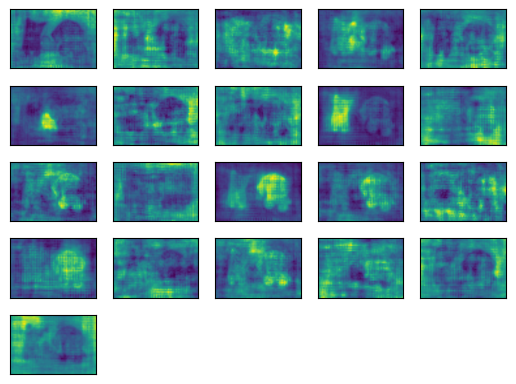

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

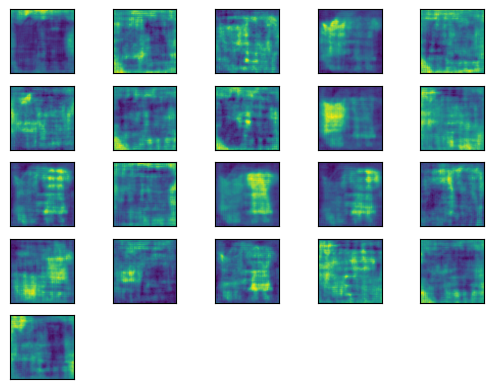

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

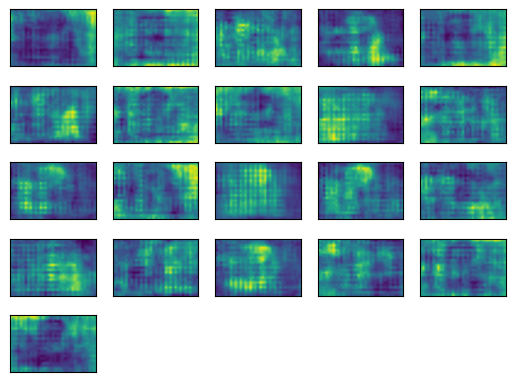

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

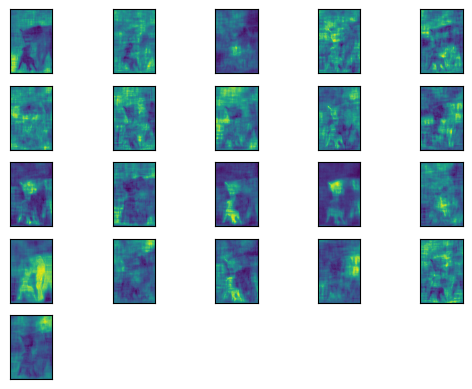

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

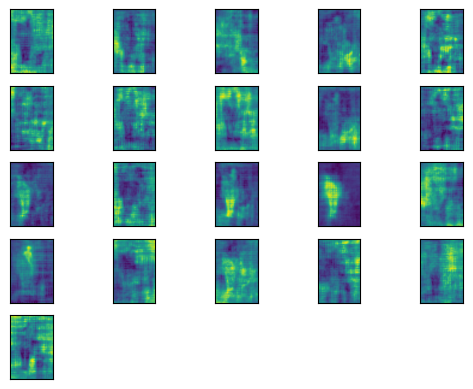

In [16]:
# Show Feature maps for each as tiles
from google.colab import files

for i in range(len(images)):
  #square = 5
  ix = 1
  j = 0
  for _ in range(5):
    for _ in range(5):
      if(j>20):
        break
      ax = plt.subplot(5, 5, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(feature_maps[i][j].cpu().numpy())
      ix += 1
      j += 1

  plt.savefig("FeatureMap"+str(i+1)+".png")
  # files.download("FeatureMap"+str(i+1)+".png")
  plt.show()

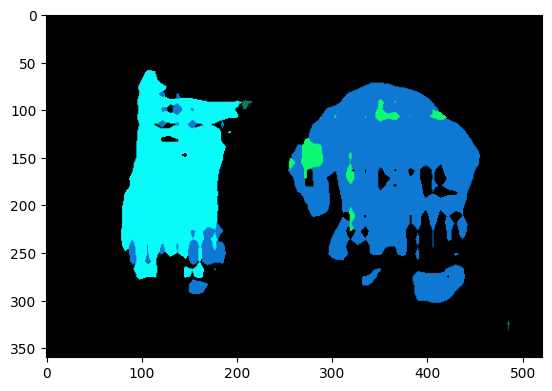

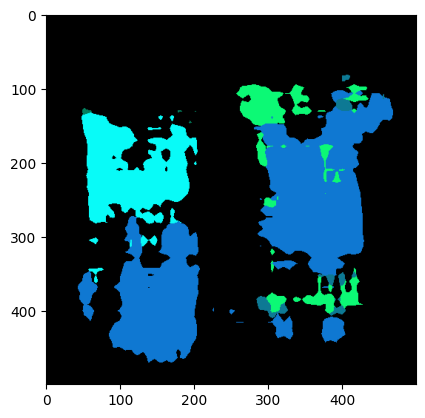

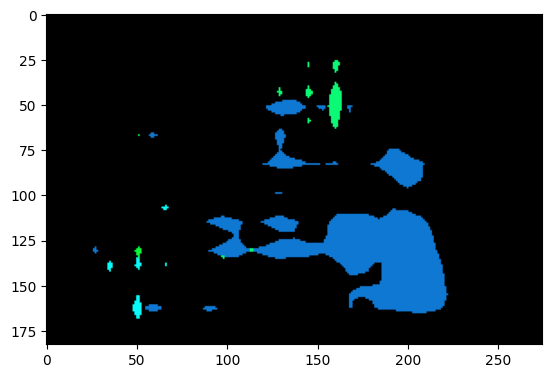

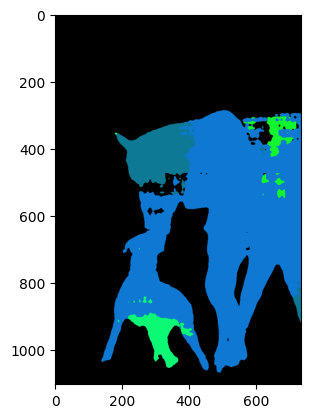

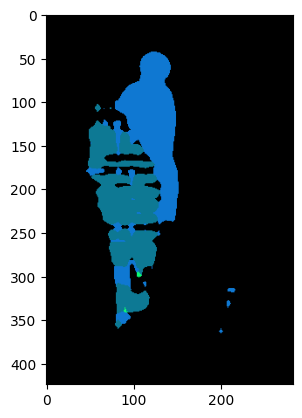

In [18]:
# Segmented images

for i in range(len(images)):

  # create a color pallette, where each class has own color
  palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
  colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
  colors = (colors % 255).numpy().astype("uint8")

  # plot the semantic segmentation predictions of 21 classes in each color
  segmented = Image.fromarray(predictions[i].byte().cpu().numpy()).resize(images[i].size)
  segmented.putpalette(colors)

  plt.savefig("Segmentation"+str(i+1)+".png")
  # files.download("Segmentation"+str(i+1)+".png")
  plt.imshow(segmented)
  plt.show()